# Analysis of the Women's Clothing E-Commerce Reviews

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#textAnalysis">Text Processing and Sentiment Analysis</a></li>
<li><a href="#cloud">Word Cloud and Word Distribution</a></li>
<li><a href="#sl">Supervised Learning</a></li> 
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

This Women’s Clothing E-Commerce dataset is an anonymized dataset from Kaggle, which revolves around the reviews written by customers. This dataset contains 10 features and 23486 samples. Each row corresponds to one customer's review, and includes the variables:

    Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
    Age: Positive Integer variable of the reviewers age.
    Title: String variable for the title of the review.
    Review Text: String variable for the review body.
    Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
    Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
    Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
    Division Name: Categorical name of the product high level division.
    Department Name: Categorical name of the product department name.
    Class Name: Categorical name of the product class name.

Through this analysis, I want to explore how the review text part can be best utilized to guide customers. For each item, displaying both the presentative positive and negative reviews on the website helps the customer to decide whether this item is a good fit for her. Clear guidance helps to reduce the chance that the customer buy some items they do not like and then return them. Low return rate will greatly help the e-store to reduce shipping and handling cost. Also it saves the customers' time.

In [1]:
# Load in packages

# data processing
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/syan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

<a id='wrangling'></a>
## Data Cleaning

### Check General Properties

In [3]:
# Read and Check the Data
df = pd.read_csv("../input/Womens Clothing E-Commerce Reviews.csv")
df.drop(df.columns[0],inplace=True, axis=1) #drop the first column from the csv file which is index
df.head(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [4]:
df.shape

(23486, 10)

In [5]:
#Check the data type of each column and whether they have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [6]:
# Change the column names to single words
type(df.columns)
column_names = []
for i in range(df.shape[1]):
    column_names.append(df.columns[i].strip().replace(" ","_")) 
df.columns = column_names
df.head(1)

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates


In [7]:
# Check whether the dataset contains duplicates
df.duplicated().sum()

21

In [8]:
df[df.duplicated()]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
493,1104,39,NaN,NaN,5,1,0,General,Dresses,Dresses
2959,1094,30,NaN,NaN,5,1,0,General,Dresses,Dresses
4850,829,66,NaN,NaN,5,1,0,General Petite,Tops,Blouses
5671,861,34,NaN,NaN,5,1,0,General,Tops,Knits
5776,868,61,NaN,NaN,5,1,0,General,Tops,Knits
9306,834,70,NaN,NaN,5,1,0,General Petite,Tops,Blouses
9413,1094,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses
9430,1094,36,NaN,NaN,5,1,0,General Petite,Dresses,Dresses
10787,1078,35,NaN,NaN,5,1,0,General,Dresses,Dresses
14129,862,38,NaN,NaN,5,1,0,General Petite,Tops,Knits


Notice that there are duplicated rows. But since there is no reviewer information in this dataset, it is difficult to judge whether these reviews are real duplicates of review or they are just from different reviewers but the reviewers have the same age and leaving no title and review text for these items. Since my goal is to analyze the Review Text, these duplicates are not informative due to lack of Review text. One exception is the item with index 21888, which does have a review text. This one may be a real duplicate.

### Cleaning

In [9]:
# remove duplicates
df = df.drop_duplicates()

In [10]:
# remove nulls 
df = df[df['Review_Text'].isnull() == False]

In [11]:
df.head(1)

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22640 entries, 0 to 23485
Data columns (total 10 columns):
Clothing_ID                22640 non-null int64
Age                        22640 non-null int64
Title                      19675 non-null object
Review_Text                22640 non-null object
Rating                     22640 non-null int64
Recommended_IND            22640 non-null int64
Positive_Feedback_Count    22640 non-null int64
Division_Name              22627 non-null object
Department_Name            22627 non-null object
Class_Name                 22627 non-null object
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [13]:
df.describe()

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count
count,22640.000000,22640.000000,22640.000000,22640.000000,22640.000000
mean,919.327827,43.280654,4.183525,0.818860,2.630698
std,202.270191,12.327181,1.115774,0.385142,5.786265
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [14]:
# Extracting Missing Count and Unique Count by Column
unique_count = []
for x in df.columns:
    unique_count.append([x,len(df[x].unique()),df[x].isnull().sum()])
pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T    

Column,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
Unique,1179,77,13993,22634,5,2,82,4,7,21
Missing,0,0,2965,0,0,0,0,13,13,13


In [15]:
print(df['Division_Name'].unique())
print(df['Department_Name'].unique())
print(df['Class_Name'].unique())

['Initmates' 'General' 'General Petite' nan]
['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan]
['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' nan 'Casual bottoms' 'Chemises']


<a id='eda'></a>
## Exploratory Data Analysis

### Univariate Distribution

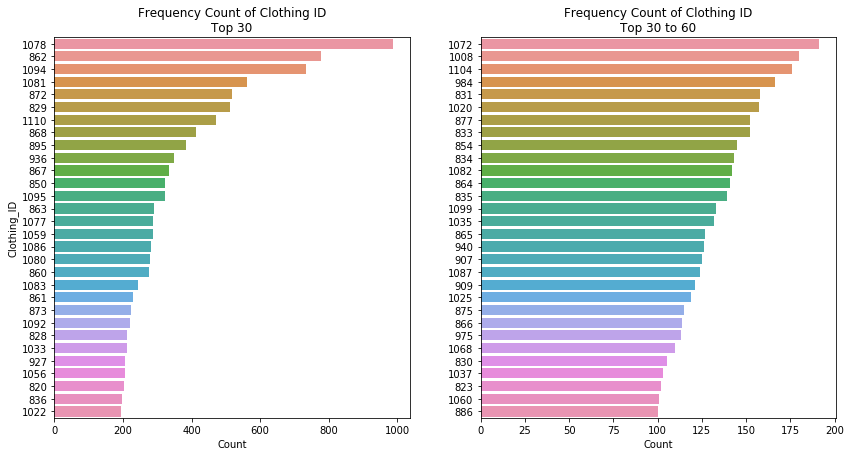

Dataframe Dimension: 22640 Rows
Number of unique Clothing_ID: (1179,)
The percentage of the counts of the top 20% Clothing_ID out of all rows: 90.22526501766784 %


In [16]:
# Clothing ID
f, axes = plt.subplots(1,2, figsize=[14,7])
num = 30
sns.countplot(y="Clothing_ID", data = df[df["Clothing_ID"].isin(df["Clothing_ID"].value_counts()[:num].index)],
              order= df["Clothing_ID"].value_counts()[:num].index, ax=axes[0])
axes[0].set_title("Frequency Count of Clothing ID\nTop 30")
axes[0].set_xlabel("Count")

sns.countplot(y="Clothing_ID", data = df[df["Clothing_ID"].isin(df["Clothing_ID"].value_counts()[num:60].index)],
              order= df["Clothing_ID"].value_counts()[num:60].index, ax=axes[1])
axes[1].set_title("Frequency Count of Clothing ID\nTop 30 to 60")
axes[1].set_ylabel("")
axes[1].set_xlabel("Count")
plt.show()

print("Dataframe Dimension: {} Rows".format(df.shape[0]))
print("Number of unique Clothing_ID: {}".format(df["Clothing_ID"].value_counts().shape))
print("The percentage of the counts of the top 20% Clothing_ID out of all rows: {} %".format(np.sum(df["Clothing_ID"].value_counts()[:235])/df.shape[0]*100))


##### Finding
The Clothing IDs with top 20% most reviews takes up 90% of reviews out of the total cleaned dataset. This dataset is more extreme than the Pareto principle (80/20 rule).

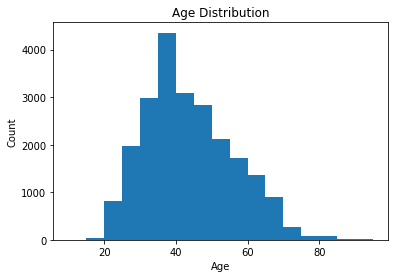

In [17]:
# Check the age distribution
plt.hist(df.Age, bins = range(10,100,5))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count");

##### Interpretation
This trend suggest that the core market segment for this clothing store is women older than 35.

In [18]:
# Check the rating distribution; Rating score > 3 is classified as positive rating
np.min(df.Rating)
count_rating = []
for i in range(1,6):
    count_rating.append((df['Rating']== i).sum())
print("Positive Ratings (Rating > 3): {0:.2f} %".format(df.query("Rating > 3").count()[0]/df.shape[0] * 100) )
print("Neutral Ratings (Rating = 3): {0:.2f} %".format(df.query("Rating == 3").count()[0]/df.shape[0] * 100) )
print("Negative Ratings (Rating < 3): {0:.2f} %".format(df.query("Rating < 3").count()[0]/df.shape[0] * 100) )

Positive Ratings (Rating > 3): 77.06 %
Neutral Ratings (Rating = 3): 12.47 %
Negative Ratings (Rating < 3): 10.47 %


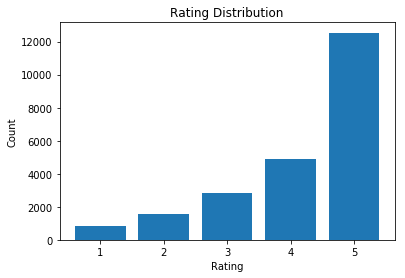

In [19]:
plt.bar(range(1,6), count_rating, align='center')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count");

##### Finding
The positive rating are much more than negative and neutral ratings.

In [20]:
# Check the distribution of Recommended IND 
np.min(df['Recommended_IND'])
count_recommend = []
for i in range(2):
    count_recommend.append((df['Recommended_IND']== i).sum())
print("Percentage of Recommended IND: {0:.2f}%".format(df.query("Recommended_IND == 1").count()[0]/df.shape[0]*100) )   

Percentage of Recommended IND: 81.89%


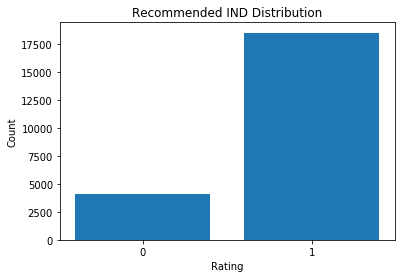

In [21]:
plt.bar(range(2), count_recommend, tick_label = [0,1])
plt.title("Recommended IND Distribution")
plt.xlabel("Rating")
plt.ylabel("Count");

##### Find
The rating and recommended_IND distributions are consisitent. About 77% ratings are positive ratings and about 82% items are recommened.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Log Positive Feedback Count')

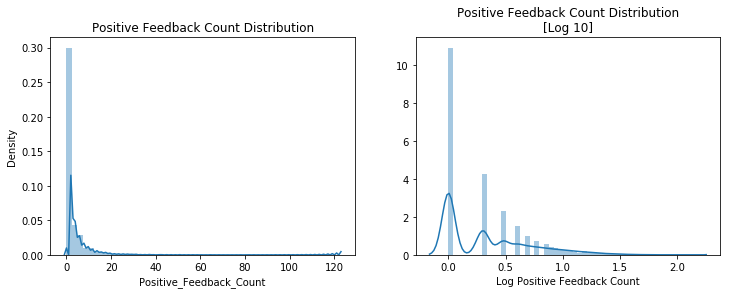

In [22]:
# Plot the positive feedback count distribution
f, ax = plt.subplots(1,2,figsize=(12,4), sharey=False)
sns.distplot(df["Positive_Feedback_Count"], ax=ax[0])
ax[0].set_title("Positive Feedback Count Distribution")
ax[0].set_ylabel("Density")
sns.distplot(np.log10((df["Positive_Feedback_Count"][df["Positive_Feedback_Count"].notnull()]+1)), ax=ax[1])
ax[1].set_title("Positive Feedback Count Distribution\n[Log 10]")
ax[1].set_xlabel("Log Positive Feedback Count")


#### Distribution of Positive Feedback Count
This kind of distribution is common for network effect phenomenon, where popularity has an exponential effect on response, and most individuals receive no attention. This phenomenon is also known as the Cumulative-Advantage Effect / Matthew Effect or the Pareto Principle.

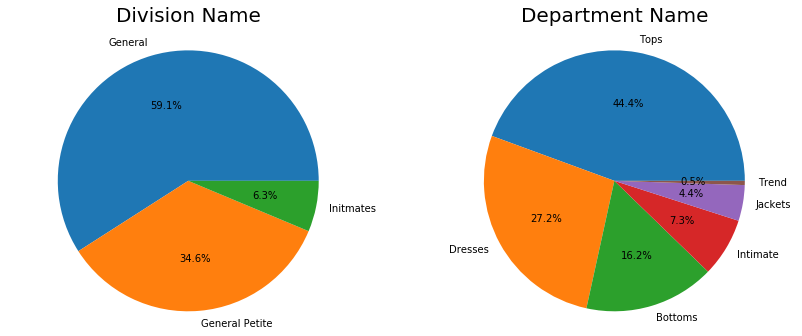

In [23]:
# Distribution of Division Names (3) and Department Names (6)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4), sharey=True)
ax1.axis('equal')
ax1.pie(df["Division_Name"].value_counts(), labels = df["Division_Name"].value_counts().index, radius = 1.5, autopct = '%0.1f%%')
ax1.set_title("Division Name", fontdict={'fontsize': 20}, pad = 50)
ax2.axis('equal')
ax2.pie(df["Department_Name"].value_counts(), labels= df["Department_Name"].value_counts().index, radius = 1.5, autopct='%0.1f%%')
ax2.set_title("Department Name", fontdict = {'fontsize': 20}, pad = 50)
plt.show()

#### Distribution of Division Name
This high level feature describes had three categories: General, Petite, and Intimates. This offers some insight into the clothing sizes of the customers leaving reviews.

#### Distribution of Department Name
Tops and Dresses are the most commonly reviewed products. It is not surprising, because typically more purchases on tops, dresses and pants than other types. 

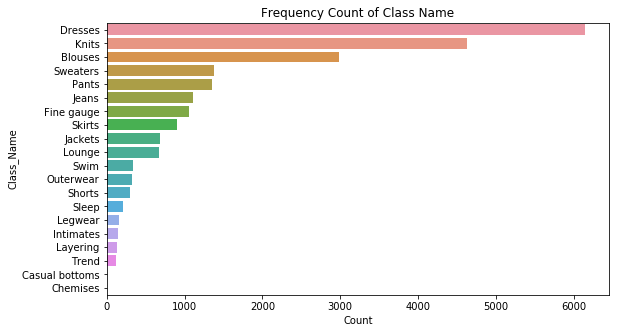

In [24]:
# Class Name (20 unique names)
plt.subplots(figsize=(9,5))
sns.countplot(y="Class_Name", data=df,order=df["Class_Name"].value_counts().index)
plt.title("Frequency Count of Class Name")
plt.xlabel("Count")
plt.show()

##### Class name distribution
There are a lot of reviews for dresses, knits, blouses, followed by sweaters, pants and jeans. This is consistent with the department name distribution. Most reviews are for tops, dresses and bottoms.

<a id='textAnalysis'></a>

## Text Processing and Sentiment Analysis

### Text Pre-processing

In [25]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
#nltk.download()
ps = PorterStemmer()

In [26]:
# Tokenize and exclude the stop words
tokenizer = RegexpTokenizer(r'[a-zA-Z]{3,}')
stop_words = set(stopwords.words('english'))

In [27]:
df['tokenized'] = df["Review_Text"].astype(str).str.lower() # Turn into lower case text
df['tokenized'] = df.apply(lambda row: tokenizer.tokenize(row['tokenized']), axis=1) # Apply tokenize to each row
df['tokenized'] = df['tokenized'].apply(lambda x: [w for w in x if not w in stop_words]) # Remove stopwords from each row
#df['tokenized'] = df['tokenized'].apply(lambda x: [ps.stem(w) for w in x])
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,tokenized
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, sexy, comfortable]"
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"[love, dress, sooo, pretty, happened, find, st..."
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[high, hopes, dress, really, wanted, work, ini..."
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[shirt, flattering, due, adjustable, front, ti..."


In [28]:
#Convert the df["tokenized"] to string 
def string_unlist(strlist):
    return " ".join(strlist)

df["tokenized_unlist"] = df["tokenized"].apply(string_unlist)
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,tokenized,tokenized_unlist
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[high, hopes, dress, really, wanted, work, ini...",high hopes dress really wanted work initially ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[shirt, flattering, due, adjustable, front, ti...",shirt flattering due adjustable front tie perf...


In [29]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
df['Polarity Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['pos'])

In [30]:
# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0.001,'Sentiment']='Positive'
df.loc[np.absolute(df['Polarity Score'])<=0.001,'Sentiment']='Neutral'
df.loc[df['Polarity Score']< -0.001,'Sentiment']='Negative'
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,tokenized,tokenized_unlist,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable,0.8991,0.154,0.000,0.846,Positive
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...,0.9710,0.468,0.000,0.532,Positive
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[high, hopes, dress, really, wanted, work, ini...",high hopes dress really wanted work initially ...,0.8779,0.721,0.040,0.240,Positive
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,0.9464,0.185,0.171,0.644,Positive
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[shirt, flattering, due, adjustable, front, ti...",shirt flattering due adjustable front tie perf...,0.9062,0.494,0.000,0.506,Positive


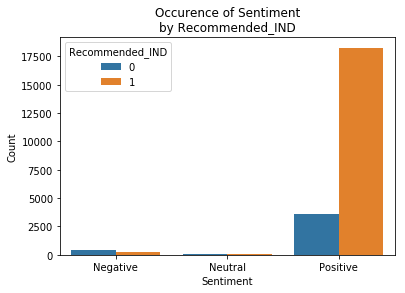

In [31]:
# Plot the occurence of sentiment and recommended_IND

huevar = "Recommended_IND"
xvar = "Sentiment"
#f, axes = plt.subplots(1,2,figsize=(12,5)) ax=axes[0], 
ax = sns.countplot(x=xvar, hue=huevar,data=df, order=["Negative","Neutral","Positive"])
ax.set_title("Occurence of {}\nby {}".format(xvar, huevar))
ax.set_ylabel("Count");


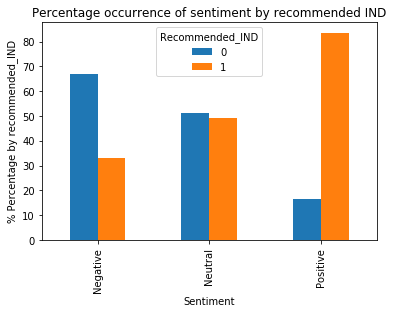

In [32]:
# Display the percentage of recommendation_IND in each type of sentiment
neg_resIND0 = (df.query('Sentiment == "Negative"')['Recommended_IND'] == 0).mean()
neg_recIND1 = (df.query('Sentiment == "Negative"')['Recommended_IND'] == 1).mean()
neu_resIND0 = (df.query('Sentiment == "Neutral"')['Recommended_IND'] == 0).mean()
neu_recIND1 = (df.query('Sentiment == "Neutral"')['Recommended_IND'] == 1).mean()
pos_resIND0 = (df.query('Sentiment == "Positive"')['Recommended_IND'] == 0).mean()
pos_recIND1 = (df.query('Sentiment == "Positive"')['Recommended_IND'] == 1).mean()

df_percentage = pd.DataFrame([['0','Negative',neg_resIND0*100],['0','Neutral',neu_resIND0*100],['0','Positive',pos_resIND0*100],['1','Negative',neg_recIND1*100],
                   ['1','Neutral',neu_recIND1*100],['1','Positive',pos_recIND1*100]],columns=['Recommended_IND','Sentiment','Percentage'])
ax = df_percentage.pivot('Sentiment','Recommended_IND','Percentage').plot(kind='bar')
ax.set_title("Percentage occurrence of sentiment by recommended IND")
ax.set_ylabel("% Percentage by recommended_IND");

In [33]:
print("Summary of sentiment analysis for Negative reviews:")
print("Precision: {}".format(len(df[df['Recommended_IND']==0][df['Sentiment']=="Negative"])/(df['Sentiment']=="Negative").sum()))    
print("Recall: {}".format(len(df[df['Recommended_IND']==0][df['Sentiment']=="Negative"])/(df['Recommended_IND']==0).sum()))

print("Summary of sentiment analysis for Positive reviews:")
print("Precision: {}".format(len(df[df['Recommended_IND']==1][df['Sentiment']=="Positive"])/(df['Sentiment']=="Positive").sum()))    
print("Recall: {}".format(len(df[df['Recommended_IND']==1][df['Sentiment']=="Positive"])/(df['Recommended_IND']==1).sum()))

Summary of sentiment analysis for Negative reviews:
Precision: 0.6699029126213593
Recall: 0.10095098756400878
Summary of sentiment analysis for Positive reviews:
Precision: 0.8349412463993416
Recall: 0.9850045849290685


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


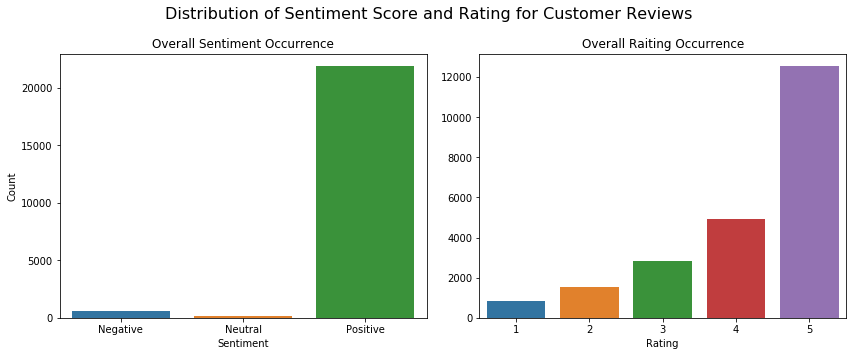

In [34]:
# Show the comparison of Sentiment Score and Rating for Customer Reviews
f, axes = plt.subplots(1,2, figsize=[12,5])
sns.countplot(x="Sentiment", data=df, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")
axes[0].set_title("Overall Sentiment Occurrence")

sns.countplot(x="Rating", data=df, ax=axes[1])
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("")
axes[1].set_title("Overall Raiting Occurrence")

f.suptitle("Distribution of Sentiment Score and Rating for Customer Reviews", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.85)
plt.show()


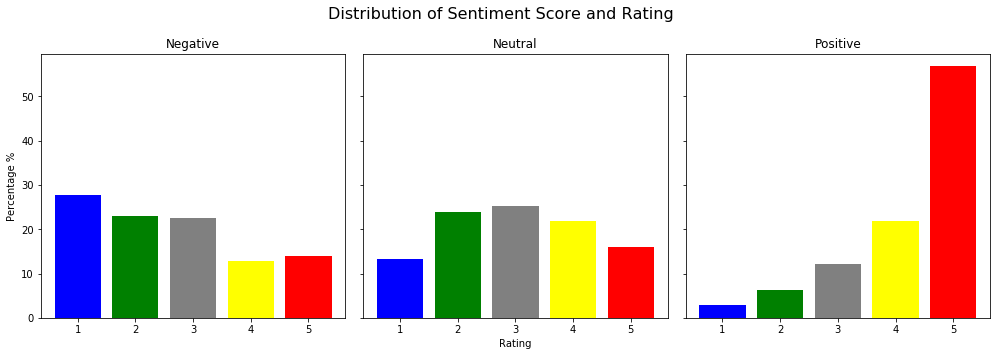

In [35]:
# 
rating = []
percentage = []
for i in range(1,6):
    rating.append(i)
    percentage.append((df.query('Sentiment == "Negative"')['Rating'] == i).mean()) 
df_neg = pd.DataFrame(data = {'Rating':rating, 'Percentage': percentage})
rating.clear()
percentage.clear()

for i in range(1,6):
    rating.append(i)
    percentage.append((df.query('Sentiment == "Neutral"')['Rating'] == i).mean()) 
df_neu = pd.DataFrame(data = {'Rating':rating, 'Percentage': percentage})
rating.clear()
percentage.clear()

for i in range(1,6):
    rating.append(i)
    percentage.append((df.query('Sentiment == "Positive"')['Rating'] == i).mean()) 
df_pos = pd.DataFrame(data = {'Rating':rating, 'Percentage': percentage})
rating.clear()
percentage.clear()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,5), sharey=True)
colors = ['blue','green','grey','yellow','red']
ax1.bar(df_neg['Rating'], df_neg['Percentage']*100, align='center', color=colors)
ax1.set_title("Negative")
ax1.set_ylabel("Percentage %")
ax2.bar(df_neu['Rating'], df_neu['Percentage']*100, align='center', color=colors)
ax2.set_title("Neutral")
ax2.set_xlabel("Rating")
ax3.bar(df_pos['Rating'], df_pos['Percentage']*100, align='center', color=colors)
ax3.set_title("Positive")

f.suptitle("Distribution of Sentiment Score and Rating", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.85)
plt.show()


In [36]:
print("Summary of sentiment analysis for negative review: \n")
print("Precision: {}".format(len(df[df['Rating']<=2][df['Sentiment']=="Negative"])/(df['Sentiment']=="Negative").sum()))    
print("Recall: {}".format(len(df[df['Rating']<=2][df['Sentiment']=="Negative"])/(df['Rating'] < 2).sum()))
# print("Summary of sentiment analysis accuracy: \n")
# print("Ratings are correctly assigned as Negative (Recall): {}".format(df[df['Rating']<2 & df['Sentiment']=="Negative"].sum()/(df['Rating'] < 2).sum())

Summary of sentiment analysis for negative review: 

Precision: 0.5080906148867314
Recall: 0.38246041412911086


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


##### Interpretation
Since there are more reviews with high rating scores, so it appears less low rating reviews classify as positive reviews, but high percentage high rating reviews classify as negative reviews. But we still see the current trend of the sentiment analysis is correct.

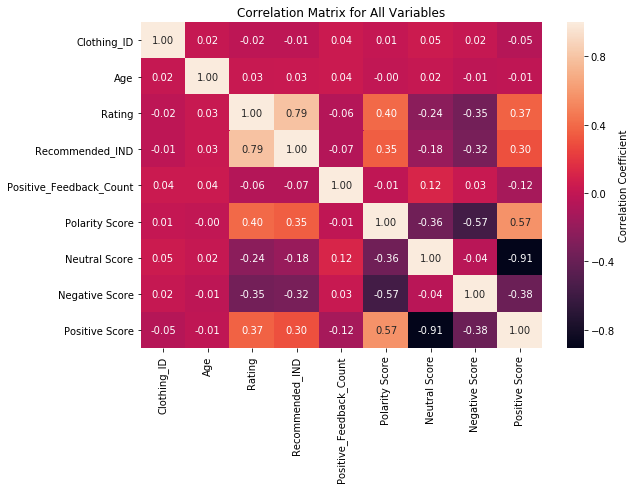

In [37]:
# Plot Correlation Matrix for all features
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(df.corr(), annot=True,
                 fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix for All Variables")
plt.show()


##### Findings
1. Recommended IND and Rating show strong positive correlations, which is not suprising. 
2. The polarity score has a little better correlation with Rating and Recommended_IND than the correlation between the positive score and Rating/Recommended_IND.
3. The Neutral score and positive score show the strongest negative correlation. Interestingly, the correlation between negative score and positive score are not that strong. This makes sense because when there are extreme words in the review, the negative score will be close to 0 (almost a constant), but both neutral and positive score will be higher than 0. 
4. The polarity score positively correlates with the positive score, but negatively correlates with the other two scores. 


<a id='wrangling'></a>
## Word Cloud and Word Distribution

In [38]:
# Define helper functions for displaying word cloud
stop_words = set(STOPWORDS)
stop_words.add("dress")
stop_words.add("petite")

size = (10,7)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stop_words,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    
# Frequency Calculation [One-Gram]
def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

# Preprocess the input reviews
def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') 
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] 
    #words = [ps.stem(w) for w in words] 
    return words

### Visualize Titles

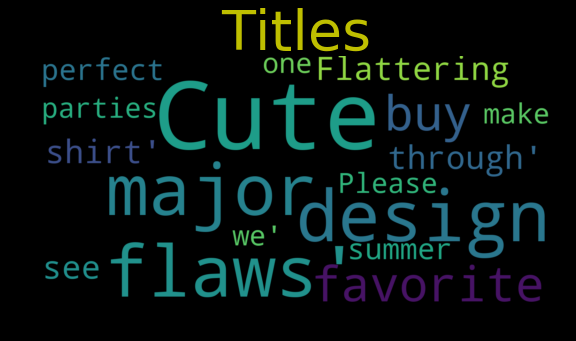

In [39]:

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class_Name"][df["Class_Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= df.Title[df.Title.notnull()].astype(str).values,
      title="Titles",
      stopwords= new_stop,
      size = (7,4))

### Visualize Reviews

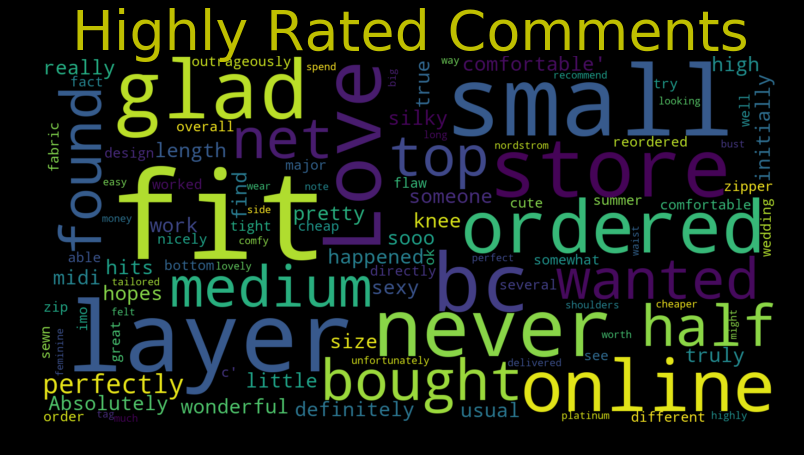

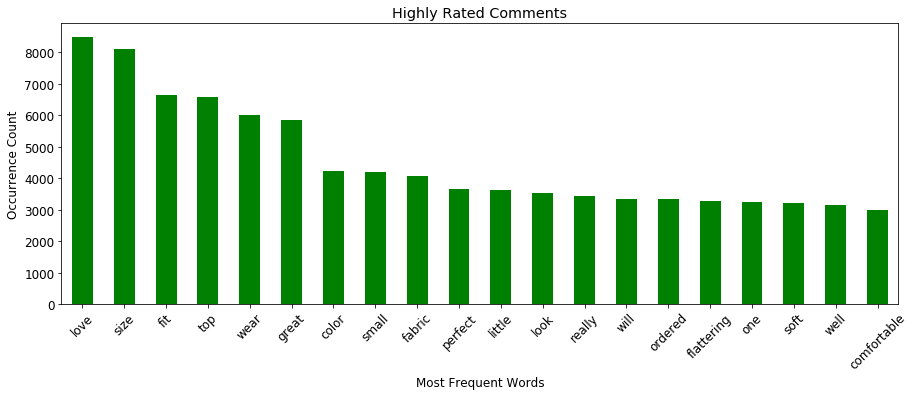

In [40]:
# Show the word cloud and word distribution for the high rating reviews
title ="Highly Rated Comments"
temp = df['Review_Text'][df.Rating.astype(int) >= 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(stop_words)
new_stop.update([x.lower() for x in list(df["Class_Name"][df["Class_Name"].notnull()].unique())])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

# Bar Chart
wordfreq(preprocessing(temp),20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()


##### Interpretation
Only 7 out of the 20 most frequent words are definitely positive word. Others are all neutral.

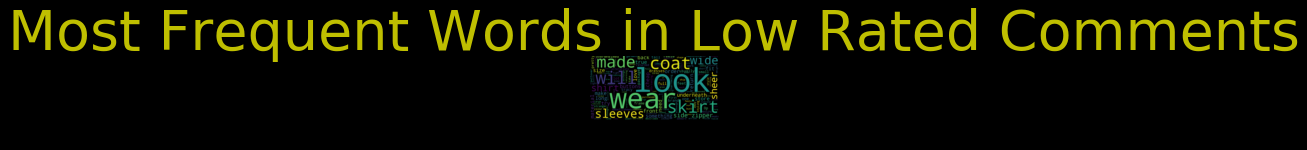

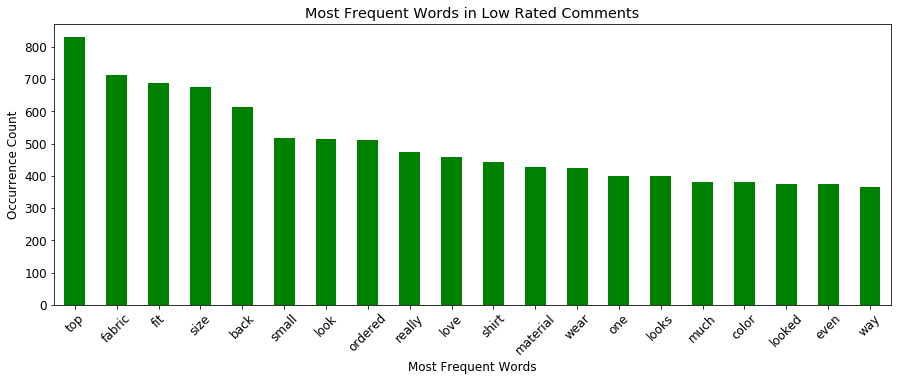

In [41]:
# Show the word cloud and word distribution for the low rating reviews
title ="Most Frequent Words in Low Rated Comments"
temp = df['Review_Text'][df.Rating.astype(int) < 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class_Name"][df["Class_Name"].notnull()].unique())]
                + ["dress", "petite", "skirt","shirt"])

# Cloud
cloud(temp.values, title= title, stopwords = new_stop)

# Bar Chart
wordfreq(preprocessing(temp),20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()

##### Interpretation
We can see positive words in these 20 most frequent words of the low ratings. These positive word may come from the phrases composed with a negative word and a positive to express a negative meaning. It will be interesting to use n-grams to check the frequency.

<a id='sl'></a>
## Supervised Learning
### Naive Bayes
From sentiment analysis, we can judge whether a review is positive, neutral or negative based on the review text. It is also interesting to build a supervised learning classifier using the words in reviews and the Rating scores or the Recommended_IND labels. Using such a classifier we can also predict whether a review is positive, neutral or negative based on the review text.

Naive Bayes is one type of supervised learning, which works very well for the text data, for the reason that the text data usually satisfies the Naive Bayes Classifier assumptions:
1. The probability of occurrence of any word given the class label, is independent of the probability of occurrence of any other word, given that label.
2. The probability of occurrence of a word in a document, is independent of the location of that word within the document.

In [42]:
df['Review_Text'].isnull().any()

False

In [43]:
# Extract the positive and negative reviews to form the new dataframe for NBC.
rating_class = df[(df['Rating'] <3) | (df['Rating'] >3)]
X_review = rating_class['Review_Text']
rating_class['rating_senti'] = np.where(rating_class['Rating']<3.0, 0, 1)
y = rating_class['rating_senti']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [44]:
y.shape

(19817,)

In [45]:
y.value_counts()

1    17447
0     2370
Name: rating_senti, dtype: int64

In [46]:
# Write a function of text_process which can be used as the analyzer in CountVectorizer
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [47]:
# import CountVectorizer and learn a vocabulary dictionary of all tokens from all rows
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [48]:
print(len(bow_transformer.vocabulary_))

18414


In [49]:
# Transform all review text to document-term matrix.
X_review = bow_transformer.transform(X_review)

In [50]:
X_review.shape

(19817, 18414)

In [51]:
y.shape

(19817,)

In [52]:
# Generate the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

In [53]:
# Import the MultinomialNB classifier for this classification
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
predict_train = nb.predict(X_train)
predict_test = nb.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
print("Results for training set: ")
print(confusion_matrix(y_train, predict_train))
print('\n')
print(classification_report(y_train, predict_train))

Results for training set: 
[[ 1078   585]
 [  109 12099]]


             precision    recall  f1-score   support

          0       0.91      0.65      0.76      1663
          1       0.95      0.99      0.97     12208

avg / total       0.95      0.95      0.95     13871



In [56]:
print("Results for test set: ")
print(confusion_matrix(y_test, predict_test))
print('\n')
print(classification_report(y_test, predict_test))

Results for test set: 
[[ 355  352]
 [ 102 5137]]


             precision    recall  f1-score   support

          0       0.78      0.50      0.61       707
          1       0.94      0.98      0.96      5239

avg / total       0.92      0.92      0.92      5946



#### Compare the precision and recall with the results from sentiment analysis for the negative reviews
Precision of sentiment analysis: 0.51

Recall of sentiment analysis: 0.38

The Naive Bayes classifier works better.

In [57]:
rating_positive=df['Review_Text'][3]
rating_positive

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [58]:
rating_positive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_positive_transformed)[0]

1

In [59]:
# NBC for Recommended_IND
X_predict_recommend=df['Review_Text']
y_recommend=df['Recommended_IND']

bow_transformer=CountVectorizer(analyzer=text_process).fit(X_predict_recommend)

X_predict_recommend = bow_transformer.transform(X_predict_recommend)

X_train, X_test, y_train, y_test = train_test_split(X_predict_recommend, y_recommend, test_size=0.3, random_state=101)

nb = MultinomialNB()
nb.fit(X_train, y_train)

predict_train = nb.predict(X_train)
predict_test = nb.predict(X_test)

print("Results for training set: ")
print(confusion_matrix(y_train, predict_train))
print('\n')
print(classification_report(y_train, predict_train))

print("Results for test set: ")
print(confusion_matrix(y_test, predict_test))
print('\n')
print(classification_report(y_test, predict_test))

Results for training set: 
[[ 2117   792]
 [  424 12515]]


             precision    recall  f1-score   support

          0       0.83      0.73      0.78      2909
          1       0.94      0.97      0.95     12939

avg / total       0.92      0.92      0.92     15848

Results for test set: 
[[ 716  476]
 [ 322 5278]]


             precision    recall  f1-score   support

          0       0.69      0.60      0.64      1192
          1       0.92      0.94      0.93      5600

avg / total       0.88      0.88      0.88      6792



#### Compare with the sentiment analysis
Summary of sentiment analysis for Negative reviews:
Precision: 0.67
Recall: 0.10

Summary of sentiment analysis for Positive reviews:
Precision: 0.83
Recall: 0.98